## Notes:

### Sensitivity Anaylsis:


In [174]:
opt = '03'

In [175]:
from hydro import objective_fxns as obfx

In [176]:
fl = './Como_LHC_%s.out'%opt

In [177]:
with open(fl) as f:
    dat = f.readlines()
    
dat = [x.strip() for x in dat] # remove whitespace

In [178]:
times = []
key = 'time cost'
for l in dat:
    if len(l) < len(key):
        exit
    
    if l[:len(key)] == key:
        tag,val = l.split('=')
        
    else:
        continue
    
    times.append(float(val.split(' ')[1]))

times = np.array(times)

In [179]:
times /= 60.

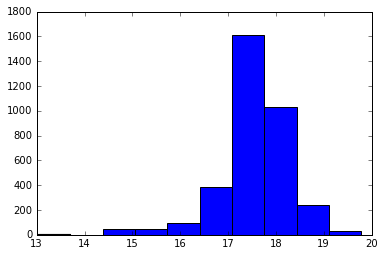

In [180]:
plt.hist(times);

In [181]:
len(times)

3499

In [182]:
tmp = pd.read_csv('./Como_LHS_%s.csv'%int(opt))

In [183]:
len(tmp)

3499

In [184]:
tmp.sort_values(by = 'like1',ascending=False,inplace=True)
tmp.iloc[0:6,0:17]

,like1,pargw1,pargw2,parsd,parm,parksat,parcrd,partrd,parpo,parpa,parsnowtemp,parraintemp,parsmtc,parmsed,para,parb,parc
1671,0.726206,0.424186,0.913236,32.441292,24.283926,583.968038,12.715149,3.603120,8.294164,223.681367,2.643211,-0.769543,0.373090,-98.957241,4.965759,15.205467,0.556704
1791,0.711534,0.664035,0.835093,28.128989,17.214093,681.274061,10.160539,2.499378,33.589185,332.825693,3.196429,-2.234063,0.321951,-76.071431,0.268014,0.102779,0.388844
1538,0.662812,0.394984,0.667382,17.250209,15.281492,503.847745,12.222487,3.123447,3.041560,424.804328,3.547884,-2.806034,0.494176,-80.880611,1.793916,20.577059,0.379384
396,0.650728,0.504504,0.497937,39.836972,3.696568,476.171478,13.511827,3.373092,22.820222,778.189253,2.280199,-0.746179,0.575465,-88.830466,0.399335,0.329649,0.428707
2690,0.637785,0.019979,0.541070,31.764347,1.448733,390.072506,11.113907,3.495391,0.597168,975.482315,3.865520,-3.704306,0.115671,-38.649740,8.237842,7.218583,0.229848
2588,0.597368,0.613366,0.530754,29.256894,9.280165,670.363337,5.648593,3.419666,31.005073,169.852359,3.556101,-0.200129,0.318288,-71.916118,6.121255,24.312812,0.644554


(0, 1)

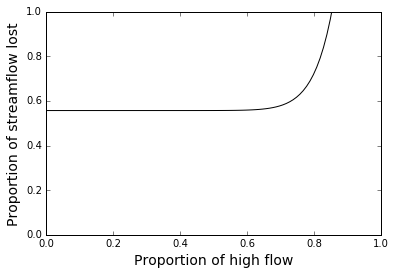

In [185]:
# define a function that increases the leakage as flow increases
def leakage(x,a,b,c): return a*(x**b) + c

x = np.linspace(0,1,100,endpoint=True)
y = leakage(x,tmp.iloc[0].para,tmp.iloc[0].parb,tmp.iloc[0].parc)

plt.plot(x,y,'-k')
plt.xlabel('Proportion of high flow', fontsize = 14)
plt.ylabel('Proportion of streamflow lost',fontsize = 14)
plt.ylim(0,1)

In [186]:
obs = pd.read_pickle('/RHESSys/Como/obs/como_q_obs.pcl')['2004-10-01':'2007-09-30']
obs = obs.discharge.as_matrix()

In [187]:
sim = tmp.sort_values(by = 'like1',ascending=False).iloc[0,17:-1].as_matrix()
#print len(obs)
#print len(sim)
#4
#9

In [188]:
nse = obfx.nashsut(obs,sim)
print 'NSE: %s'%round(nse,3)

NSE: 0.734


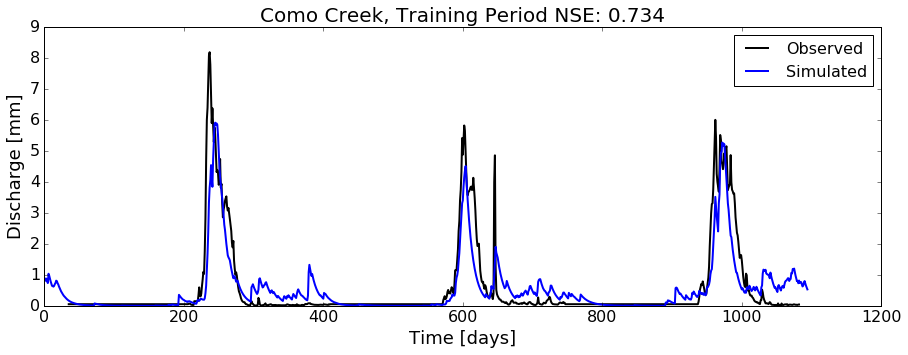

In [189]:
plt.figure(figsize=(15,5))
plt.plot(obs,label = 'Observed',lw=2, c='k')
plt.plot(sim,label = 'Simulated',lw=2)
plt.legend(fontsize=16)
plt.xlabel('Time [days]', fontsize = 18)
plt.ylabel('Discharge [mm]', fontsize = 18)
ax = plt.gca()
plt.title('Como Creek, Training Period NSE: %s'%(round(nse,3)), fontsize = 20)
[tick.label.set_fontsize(16) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(16) for tick in ax.yaxis.get_major_ticks()];
plt.savefig('./figures/experiment_LHC_%s.png'%(opt),dpi=300,bbox_inches='tight')

## Sensitivity Dotty Plots

In [190]:
cols = tmp.columns[1:17]

In [191]:
def dotty_plot(par,label):
    labelsize = 16
    tmp.plot.scatter(par,'like1',figsize=(10,5))
    plt.ylabel('Likelihood',fontsize=labelsize)
    plt.xlabel(label, fontsize=labelsize)
    ax = plt.gca()
    [tick.label.set_fontsize(labelsize-2) for tick in ax.xaxis.get_major_ticks()];
    [tick.label.set_fontsize(labelsize-2) for tick in ax.yaxis.get_major_ticks()];
    plt.ylim(-0.2,1)

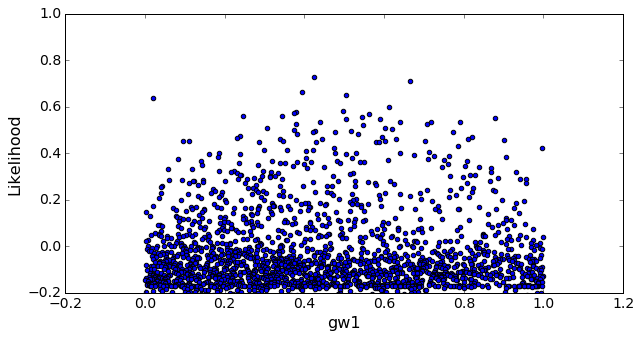

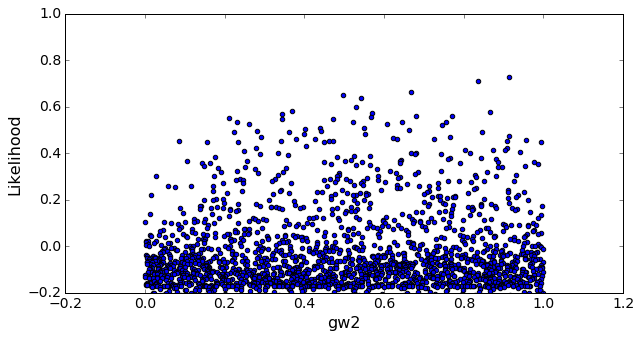

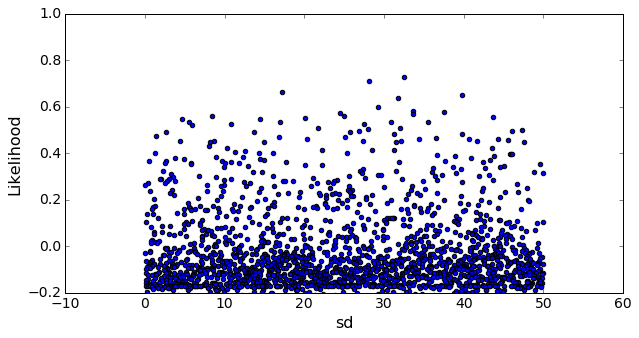

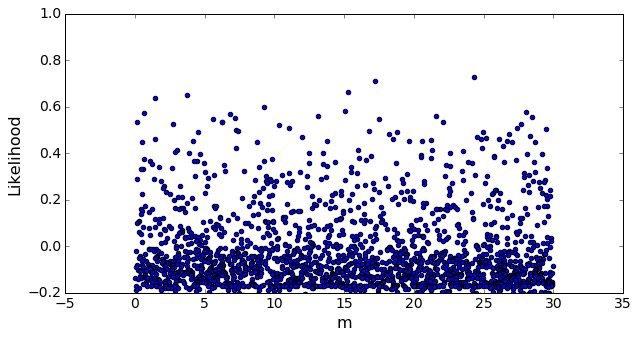

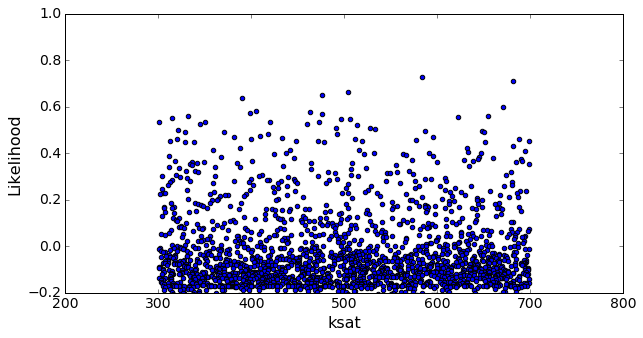

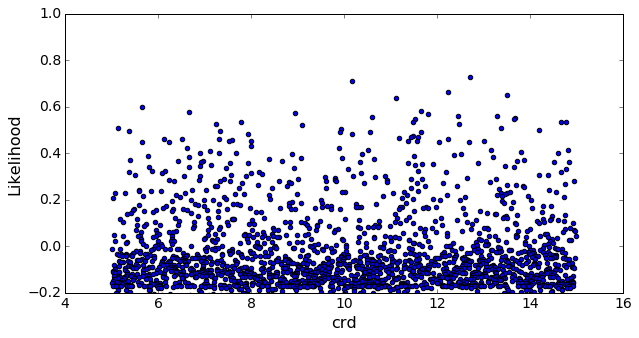

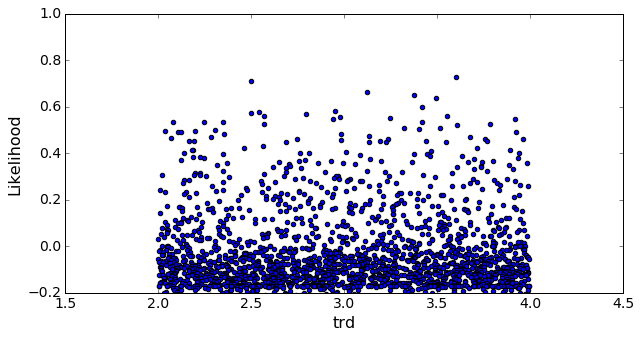

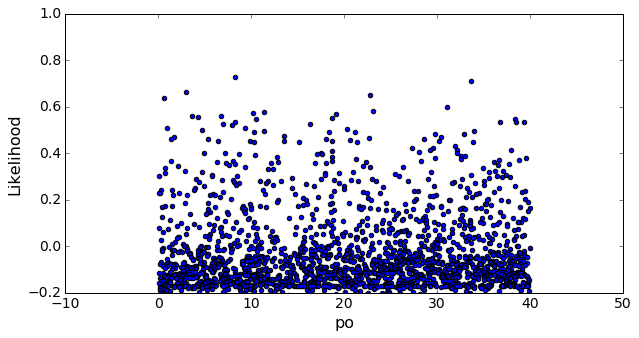

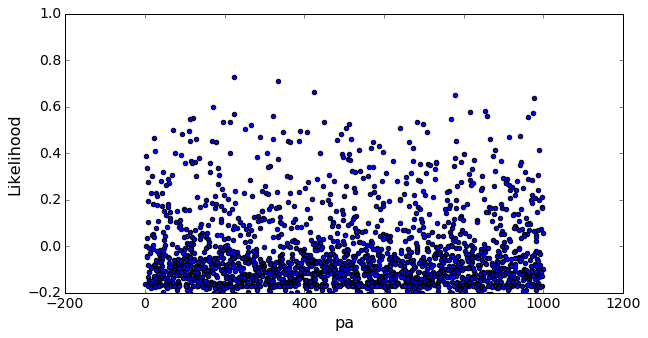

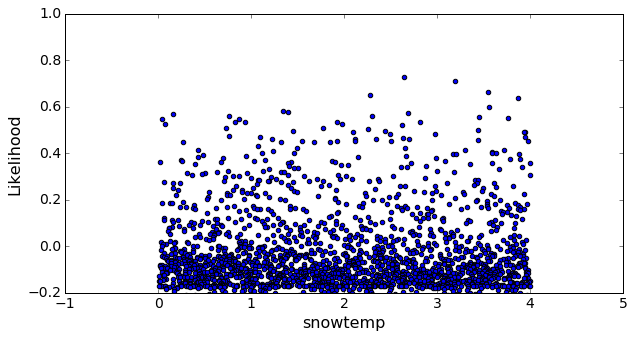

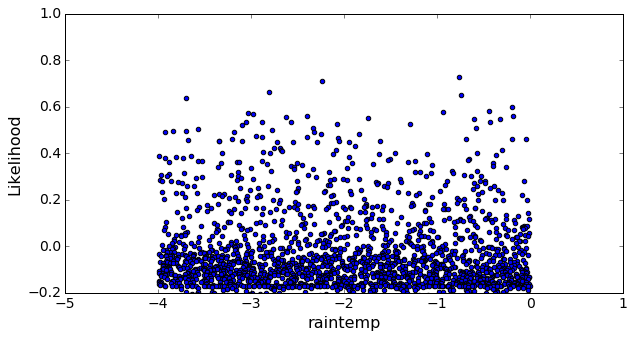

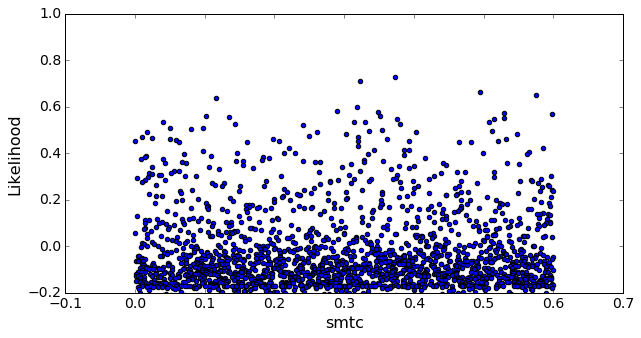

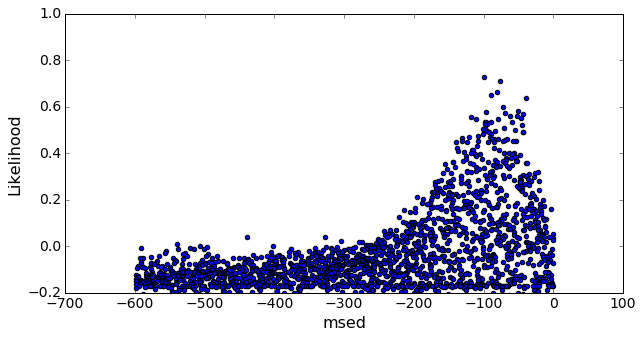

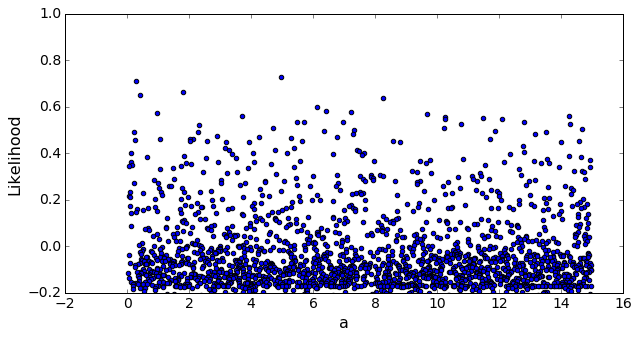

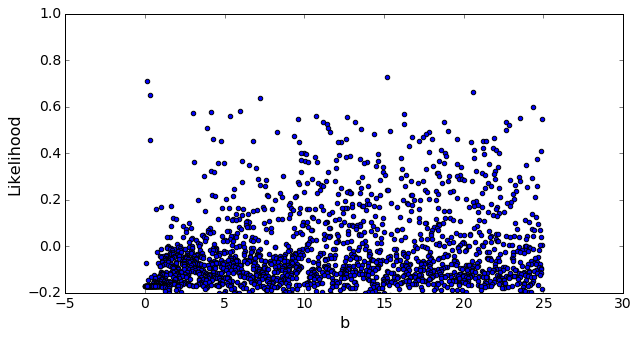

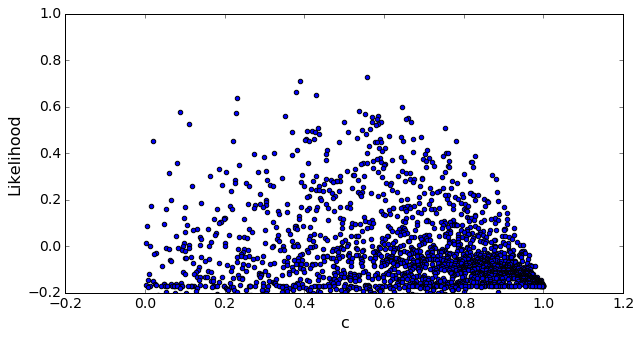

In [192]:
for col in cols:
    dotty_plot(col,col[3:])